In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import (
    #OneHotEncoder,
    #StandardScaler,
    #MinMaxScaler
#)
import warnings
warnings.filterwarnings("ignore")


#from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
#from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Goal of the weekly task
##### - tips: for the level of polynomial, count peak in monthly count for two years then +1
##### - tips: create also 24 hour group counts so we understand how many peaks there are
##### - tips: np.log1p('count"), for issemetric data apply log transformation for better fitting

#### Read the data ### 

In [175]:
data = pd.read_csv("/Users/wukaiti/Spiced/weekly_milstones/week_03/bike-sharing-demand/train.csv")


In [176]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [167]:
data.head()
data.reset_index(inplace=True)
#data.set_index("datetime",inplace=True)

In [168]:
data.columns
data.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### EDA

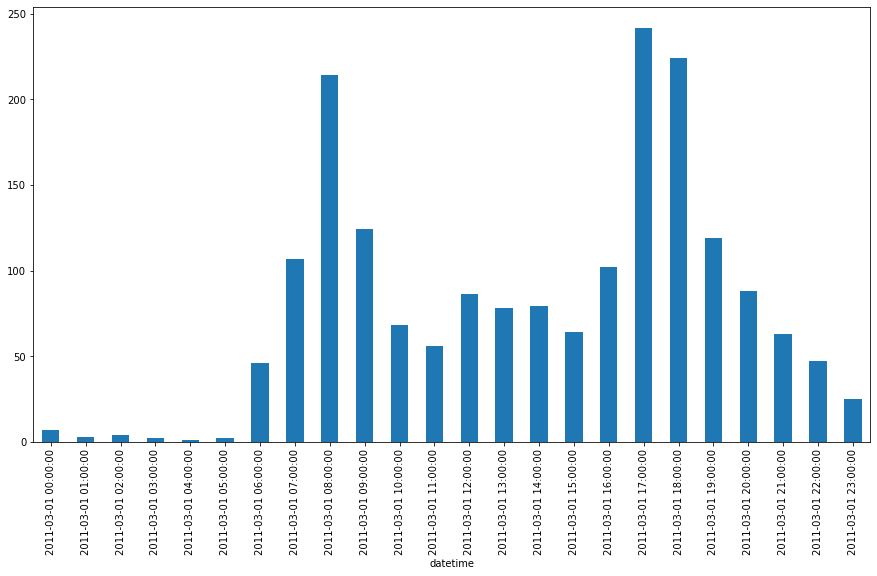

In [186]:
# distribution during workday
#count by index
data.set_index("datetime",inplace=True)
data['count']['2011-03-01'].plot(figsize=(15, 8),kind="bar");

In [177]:
data["hour"] = data["datetime"].dt.hour
data["months"] = data["datetime"].dt.month
data["years"] = data["datetime"].dt.year
data["dayofweek"] = data["datetime"].dt.dayofweek

In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'months', 'hour', 'years', 'dayofweek'],
      dtype='object')

<AxesSubplot:xlabel='dayofweek'>

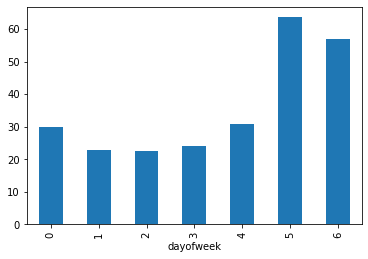

In [178]:
#data.reset_index(inplace=True)
#data.groupby("dayofweek")["registered"].mean().plot(kind="bar")
data.groupby("dayofweek")["casual"].mean().plot(kind="bar")


<AxesSubplot:xlabel='dayofweek'>

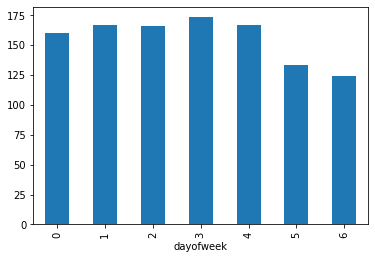

In [179]:
data.groupby("dayofweek")["registered"].mean().plot(kind="bar")

<AxesSubplot:xlabel='months'>

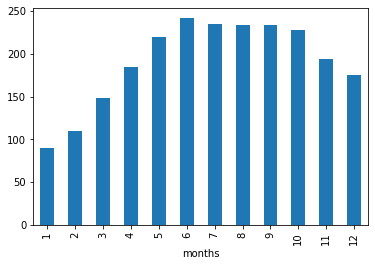

In [180]:
data.groupby("months")["count"].mean().plot(kind="bar")

In [181]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,months,years,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,12,2012,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,12,2012,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,12,2012,2


hour  season
0     1         AxesSubplot(0.125,0.125;0.775x0.755)
      2         AxesSubplot(0.125,0.125;0.775x0.755)
      3         AxesSubplot(0.125,0.125;0.775x0.755)
      4         AxesSubplot(0.125,0.125;0.775x0.755)
1     1         AxesSubplot(0.125,0.125;0.775x0.755)
                                ...                 
22    4         AxesSubplot(0.125,0.125;0.775x0.755)
23    1         AxesSubplot(0.125,0.125;0.775x0.755)
      2         AxesSubplot(0.125,0.125;0.775x0.755)
      3         AxesSubplot(0.125,0.125;0.775x0.755)
      4         AxesSubplot(0.125,0.125;0.775x0.755)
Name: casual, Length: 96, dtype: object

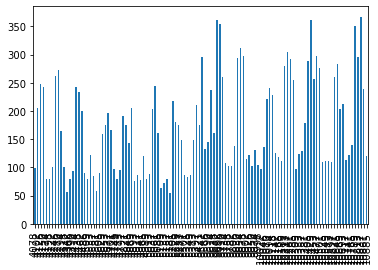

In [184]:
data.groupby(["hour","season"])["casual"].plot(kind="bar")
